In [4]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

In [127]:
import plotly.express as px
import plotly.graph_objects as go
from load_data import load_data
from config import RED
import pandas as pd
import plotly.figure_factory as ff
import plotly.io as pio

In [99]:
pio.templates.default = 'ggplot2'

In [6]:
df = load_data()

In [13]:
num_offenses = df.resample('M', on='OCCURRED_ON_DATE')['INCIDENT_NUMBER'].agg(counts='count').reset_index()

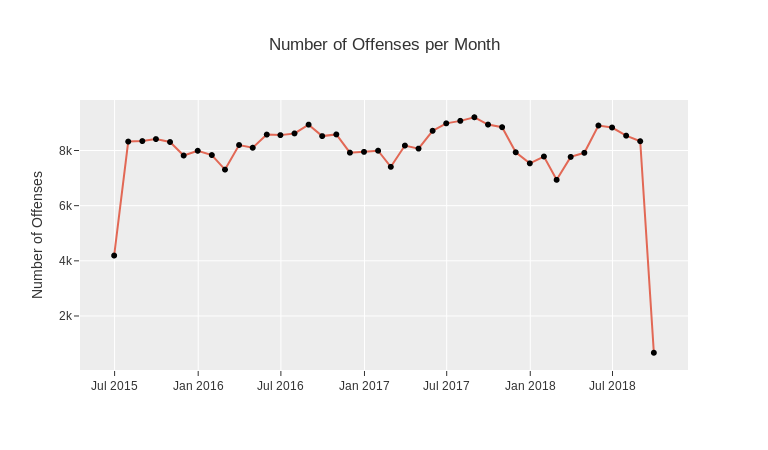

In [102]:
fig = go.Figure()
(
    fig
    .update_layout(title_text="Number of Offenses per Month",yaxis_title_text="Number of Offenses")
    .update_layout(shapes=[go.layout.Shape(type="line", xref="paper", x0=0, x1=1, y0=num_offenses.counts.mean(), y1=num_offenses.counts.mean(), line_color=RED, line_dash='dash')])
    .add_scatter(x=num_offenses.OCCURRED_ON_DATE, y=num_offenses.counts,line_color=RED, mode='markers+lines', marker_color="black", hovertemplate="Number of Offenses: %{y:0d}<extra></extra>")
    .show())

In [103]:
num_shootings = df.resample('M', on='OCCURRED_ON_DATE')['SHOOTING'].agg(num_shootings='sum').reset_index()

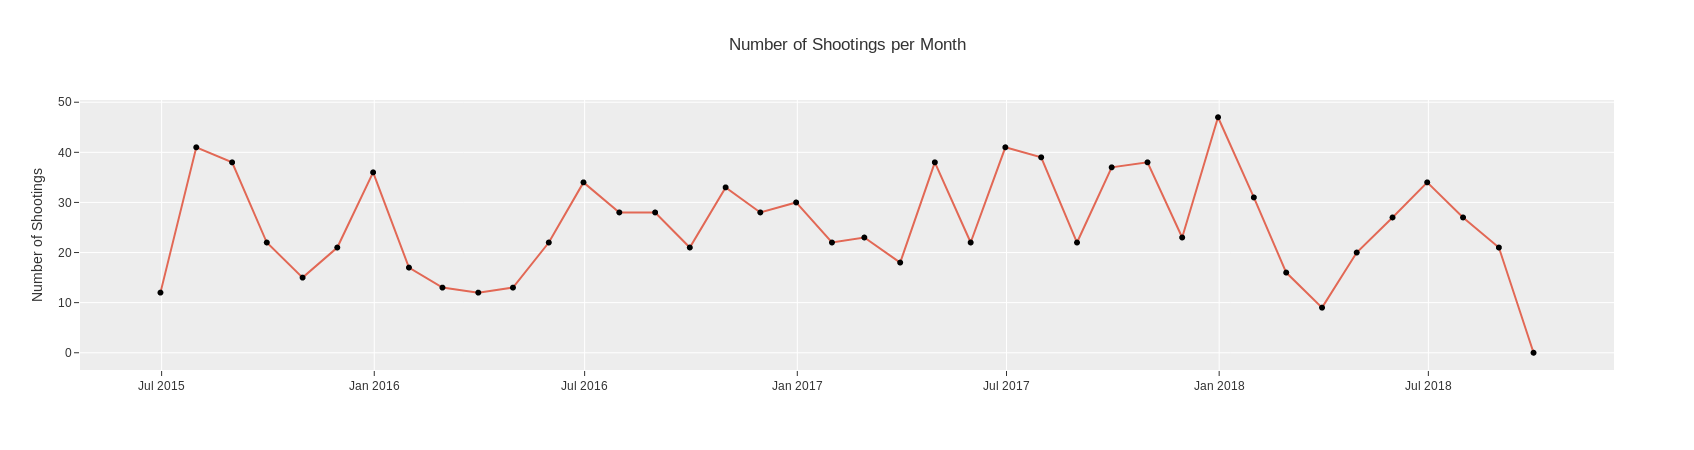

In [104]:
fig = go.Figure()
(
    fig
    .update_layout(title_text="Number of Shootings per Month", yaxis_title_text="Number of Shootings")
    .update_layout(shapes=[go.layout.Shape(type="line", xref="paper", x0=0, x1=1, y0=num_shootings.num_shootings.mean(), y1=num_shootings.num_shootings.mean(), line_color=RED, line_dash="dash")])
    .add_scatter(x=num_shootings.OCCURRED_ON_DATE, y=num_shootings.num_shootings, line_color=RED, mode='lines+markers', marker_color="black", hovertemplate="Number of Shootings: %{y:0d}<extra></extra>")
    .show()

)

In [106]:
top10_code_groups = df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values(ascending=True)

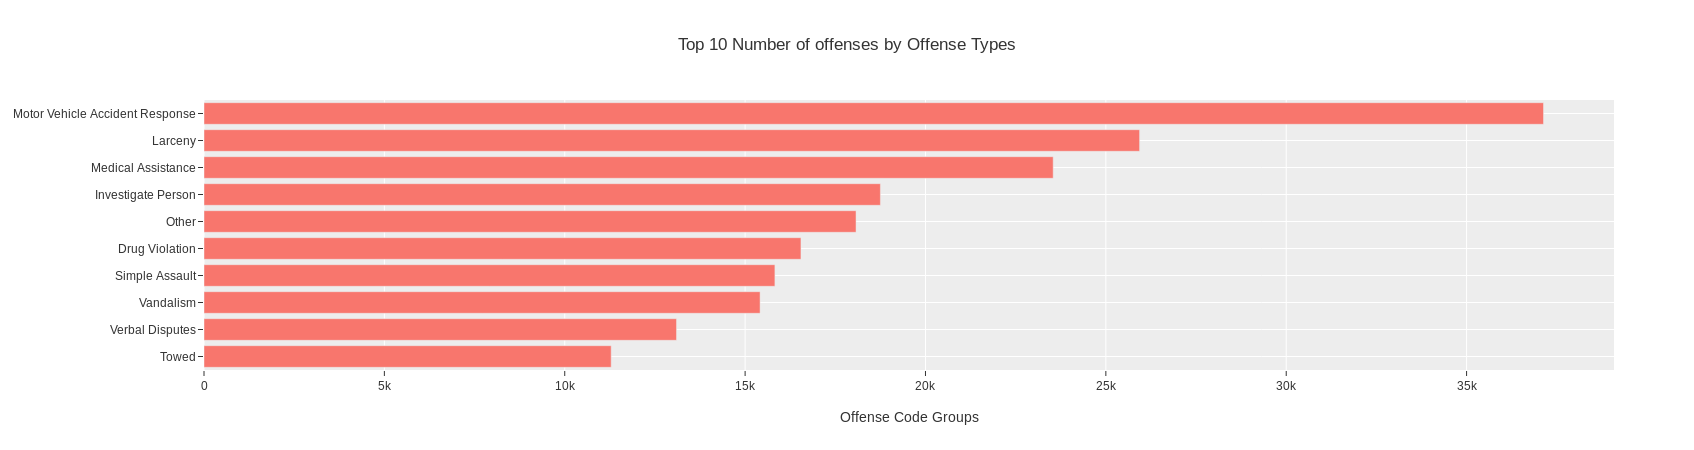

In [107]:
fig = go.Figure()

(fig
 .update_layout(title_text="Top 10 Number of offen,
                ses by Offense Types", xaxis_title_text="Offense Code Groups")
 .add_bar(y=top10_code_groups.index, x=top10_code_groups.values, orientation='h', hovertemplate="Number of Offenses: %{x:.3s}<extra></extra>")
 .show()
)

In [108]:
heatmap = pd.crosstab(df.DAY_OF_WEEK, df.HOUR)

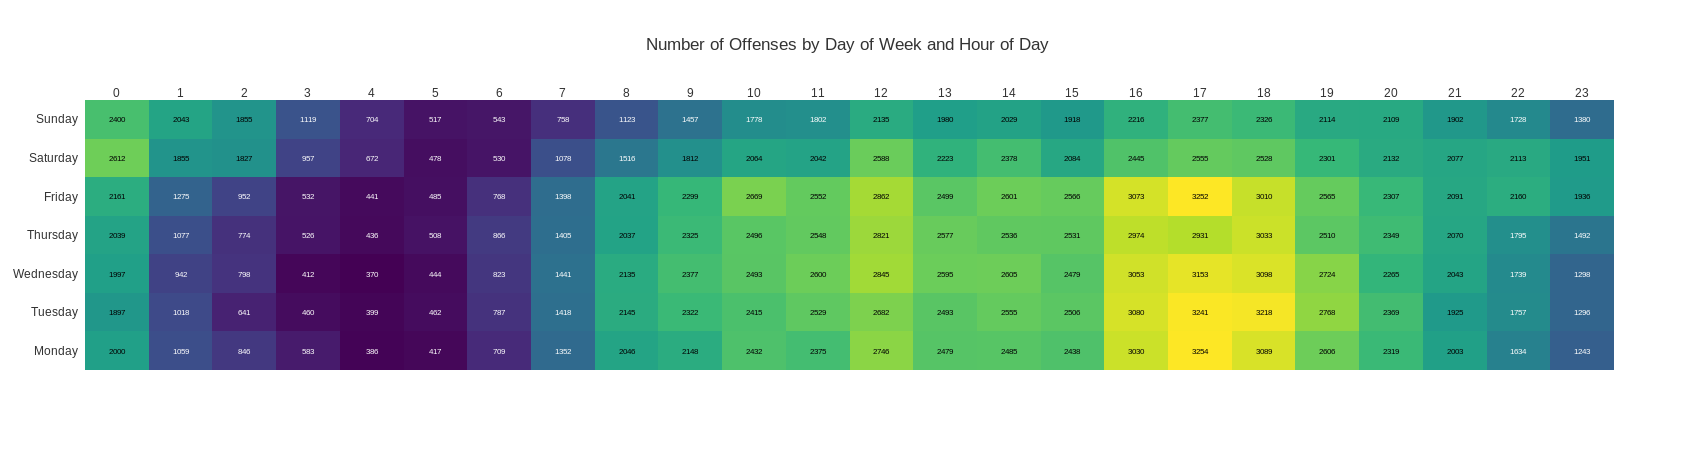

In [140]:
fig = ff.create_annotated_heatmap(heatmap.values, x=heatmap.columns.to_list(), y=heatmap.index.to_list(), annotation_text=heatmap.values, colorscale='viridis')
(fig
 .update_layout(title_text="Number of Offenses by Day of Week and Hour of Day", xaxis_nticks=24)
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8
fig.show()